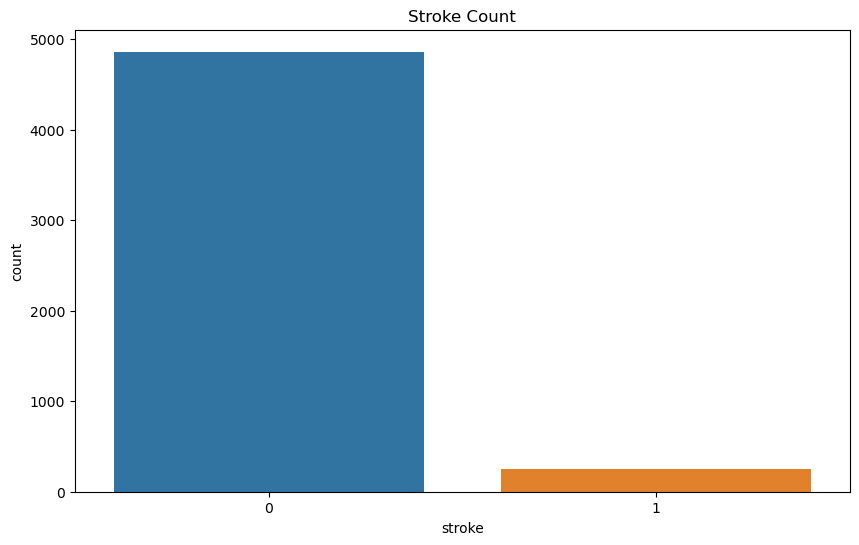

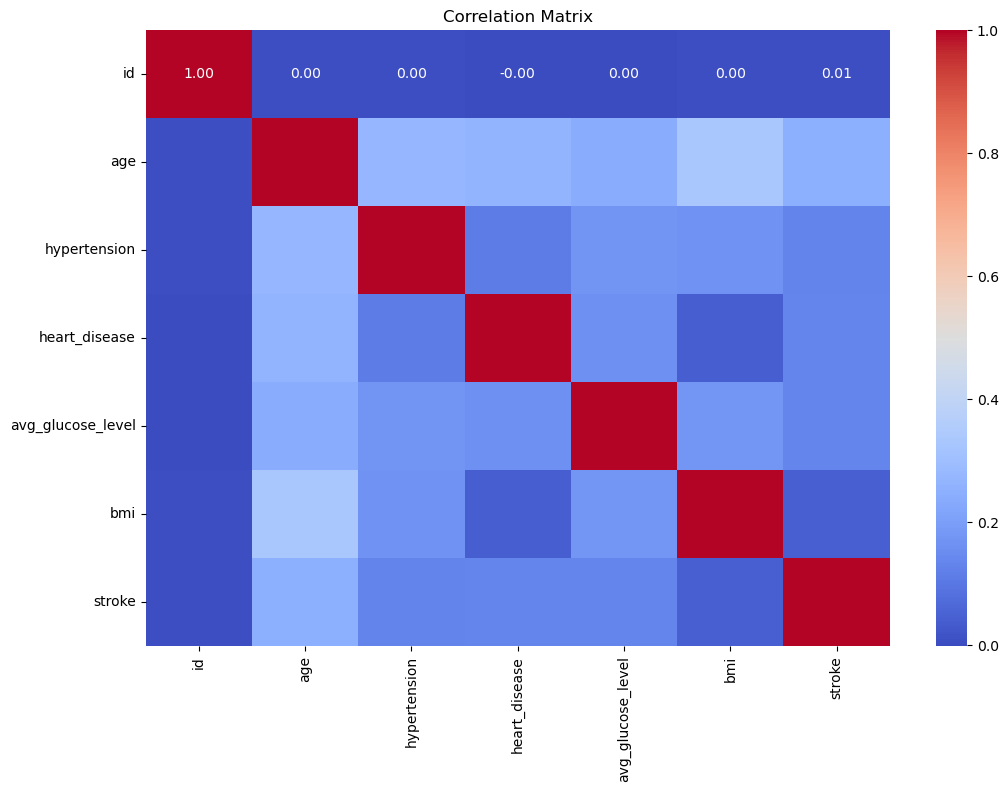

Accuracy: 0.34
              precision    recall  f1-score   support

           0       1.00      0.29      0.45       960
           1       0.08      1.00      0.15        62

    accuracy                           0.34      1022
   macro avg       0.54      0.65      0.30      1022
weighted avg       0.94      0.34      0.43      1022



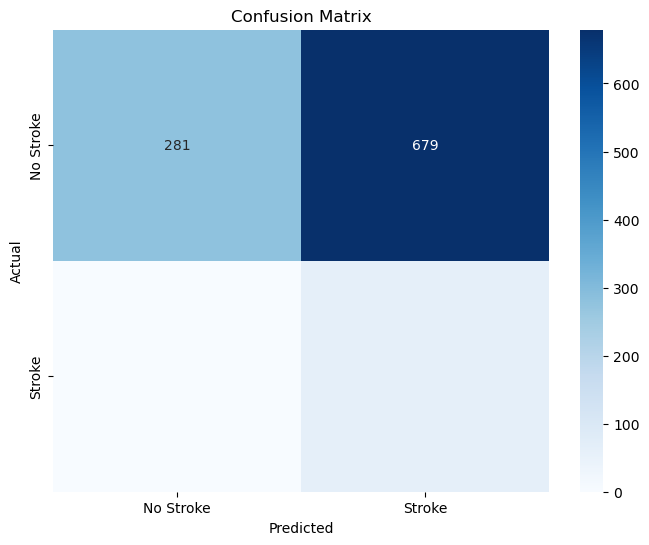

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('Dataset.csv')

# Handling 'Other' values in 'smoking_status'
df['smoking_status'] = df['smoking_status'].replace('Other', np.nan)

# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='stroke', data=df)
plt.title('Stroke Count')
plt.show()

# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing
X = df.drop('stroke', axis=1)
y = df['stroke']

# Perform one-hot encoding
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')
X = transformer.fit_transform(X)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling NaN values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


id                      int64
gender                 object
age                   float64
hypertension            int64
heart_disease           int64
ever_married           object
work_type              object
Residence_type         object
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke               category
dtype: object
['Male' 'Female' 'Other']
['Stroke', 'No Stroke']
Categories (2, object): ['No Stroke', 'Stroke']


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


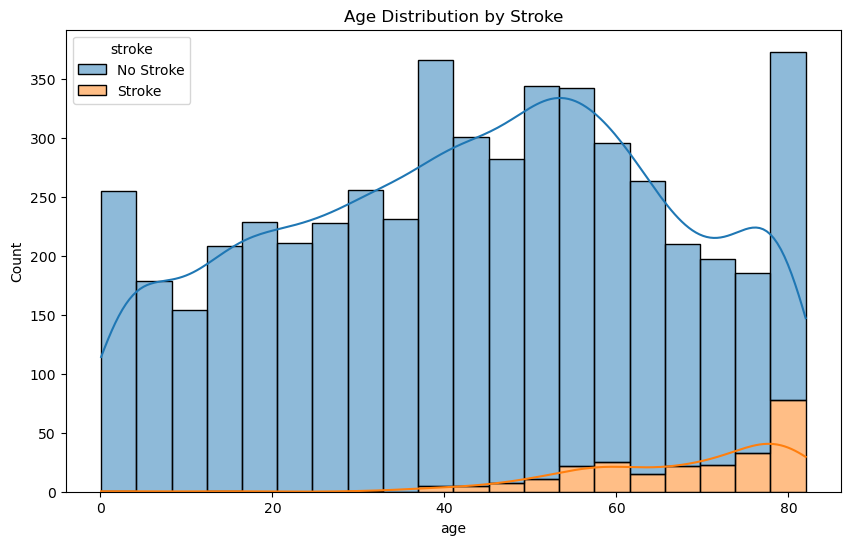

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


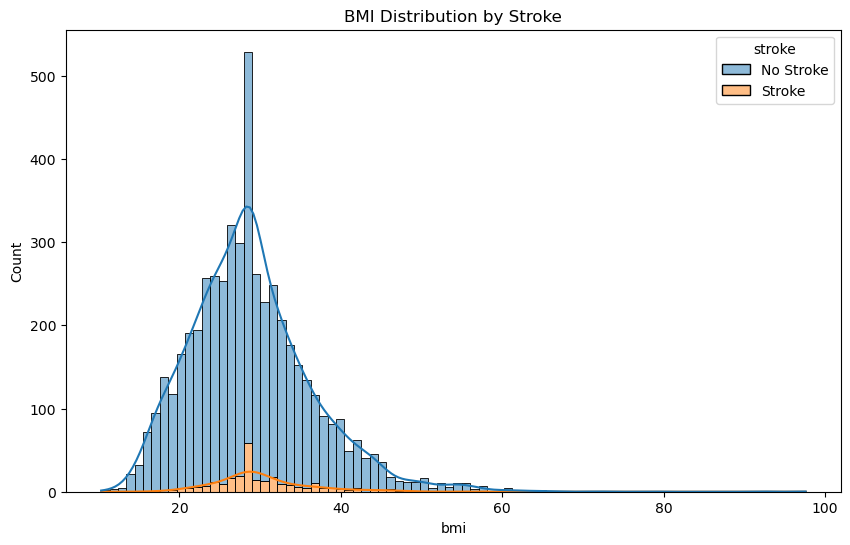

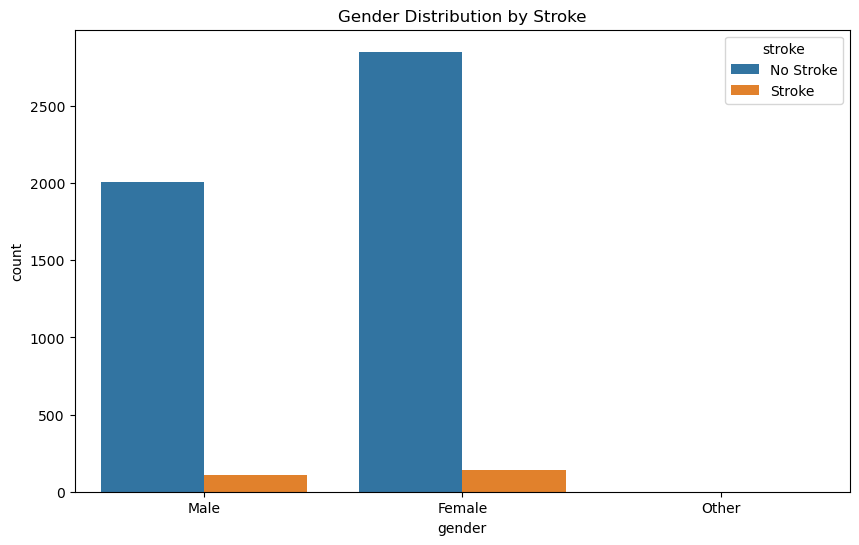

In [8]:
# Convert 'stroke' to a categorical variable with string categories
df['stroke'] = df['stroke'].astype('category')
df['stroke'] = df['stroke'].cat.rename_categories({0: 'No Stroke', 1: 'Stroke'})

# Handle NaN values in 'age' and 'bmi' columns for visualization purposes
df['age'].fillna(df['age'].mean(), inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Check the data types of the columns
print(df.dtypes)

# Check unique values in 'gender' and 'stroke' columns
print(df['gender'].unique())
print(df['stroke'].unique())

# Age Distribution by Stroke
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='stroke', multiple='stack', kde=True)
plt.title('Age Distribution by Stroke')
plt.show()

# BMI Distribution by Stroke
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='stroke', multiple='stack', kde=True)
plt.title('BMI Distribution by Stroke')
plt.show()

# Gender Distribution by Stroke
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender', hue='stroke')
plt.title('Gender Distribution by Stroke')
plt.show()
